### Task 1: The table below reports the pairwise distances between a set of 8 labelled training examples and a new query example q. (10 points)
|Example|Class|Distance to q|
|-------|-----|--------------| 
|1|over|1.2|
|2|under|3.0|
|3|over|1.3|
|4|under|2.8|
|5|under|4.0|
|6|under|5.6|
|7|over|4.3|
|8|over|3.6|

a) What class label would a 3-NN classifier assign to q? And provide reason (3 points)

b) What class label would a 4-NN classifier assign to q? And provide reason (3 points)

c) What class label would a weighted 4-NN classifier assign to q? And provide reason (4 points)

#### Answers
a) The KNN with k=3 will assign class 'over' to q. The classifier will get the 3 nearest points (1, 3, 4) and provide the majority vote. As a result, in this case the majority has class 'over'

b) The KNN with k=4 will assign class 'over' to q. The classifier will get the 4 nearest points (1, 3, 4, 2) in the order they sorted by distance. In this case, we have a tie, so KNN will get assign to q the label of first point in the list of 4 nearest points - class 'over'

c) The weighted KNN with k=4 will assign class 'over' to q. The classifier will get the 4 nearest points (1, 3, 4, 2) in the order they sorted by distance and count the occurrences of each label with the weight of 1 / distance. In this case we have a tie, so KNN will count occurrence of class 'over' with weighting in next manner: 1 * 1 / 1.2 + 1 * 1 / 1.3 = 1.6026
and class 'under': 1 * 1 / 2.8 + 1 * 1 / 3 = 0.6946. Class 'over' has greater weight, so q will get its label

### Task 2: What is the difference between overfitting and underfitting? 
And what is the correct approach in relation to overfitting and underfitting? Use visualisation and description to explain

#### Answer
Overfitting is a case when a model learns the features and noise in the training data too well, but cannot generalize on new data, which has negative influence on the performance. This can be in case of very complex models (for example, with high degree polynomials, too deep decision trees). In the other hand underfiitting is when model cannot learn even training data, as well as it cannot generalize on new data. This can happen in case of using too simple models, linear models on data with not linear dependencies.

In case of overfitting it is possible to improve the results by simplifying the model. If undefitting takes place, may help to add complexity (for example, to use polynomial features) or to change algorithm (model).

Over- and undefitting can be seen on the next plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.warn('ignore')

c:\python37\lib\site-packages\ipykernel_launcher.py:13: UserWarning: ignore
  del sys.path[0]


In [2]:
def f(x):
    return np.sin(0.5 * np.pi * x)
X = np.random.rand(50)
X = np.sort(X)
y = f(X) + np.random.randn(50) * 0.1

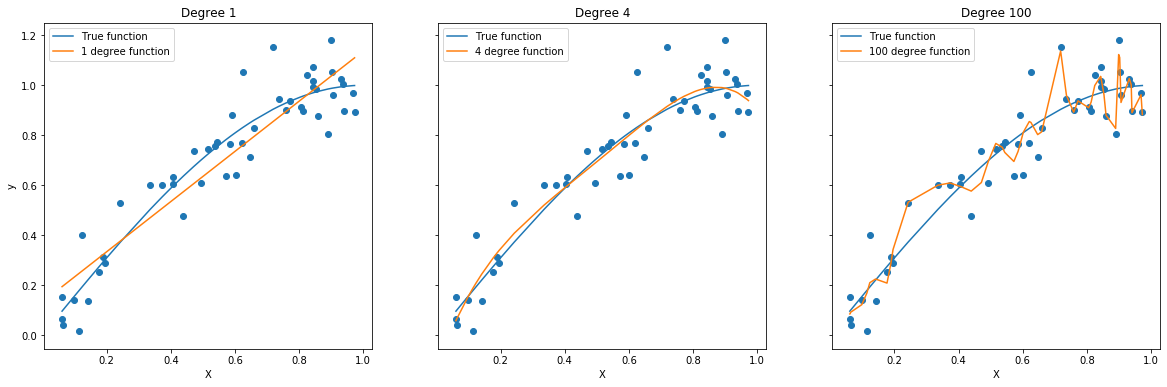

In [3]:
np.random.seed(0)
degrees = [1, 4, 100]
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    lr = LinearRegression()
    lr.fit(X_poly, y)
    yhat = lr.predict(X_poly)
    axes[i].scatter(X, y)
    axes[i].plot(X, f(X), label='True function')
    axes[i].plot(X, yhat, label='{} degree function'.format(degree))
    axes[i].title.set_text('Degree {}'.format(degree))
    axes[i].legend()
    axes[i].set(xlabel="X")
axes[0].set(ylabel='y');

On the plot 1 (Degree 1) we see an example of underfitting (it does not catch features and dependencies), plot 2 (degree 4) shows pretty reasonable result and plot 3 with high degree polynomials (100 degree) shows overfit - the line tend go through all points and will not generalize well as unseen data (as well as model on 1 plot).

### Task 3: KNN and NearestCentroid

Load dataset and scale

In [4]:
X, y = load_wine(return_X_y=True)
x_train, x_test, y_train,  y_test = train_test_split(X, y, random_state=42, test_size=0.3)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Tune KNN parameters. First, find the best number of *neighbors* and *p* by ploting validation curve

In [5]:
scores_train, scores_test = validation_curve(KNeighborsClassifier(), x_train, y_train,
                                             'n_neighbors', [3, 4, 5, 7, 9, 11, 13, 15], cv=10, scoring='accuracy')

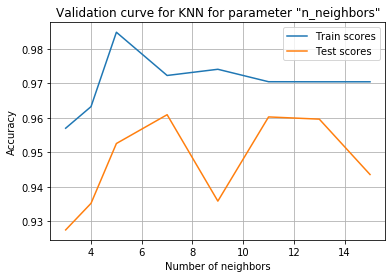

In [6]:
train_scores_means = np.mean(scores_train, axis=1)
test_scores_means = np.mean(scores_test, axis=1)
plt.figure()
plt.plot([3, 4, 5, 7, 9, 11, 13, 15], train_scores_means, label='Train scores')
plt.plot([3, 4, 5, 7, 9, 11, 13, 15], test_scores_means, label='Test scores')
plt.legend()
plt.title('Validation curve for KNN for parameter "n_neighbors"')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.grid();

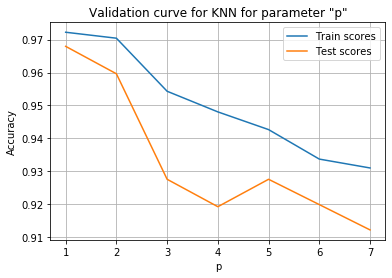

In [7]:
scores_train, scores_test = validation_curve(KNeighborsClassifier(13), x_train, y_train,
                                             'p', [1, 2, 3, 4, 5, 6, 7], cv=10, scoring='accuracy')
train_scores_means = np.mean(scores_train, axis=1)
test_scores_means = np.mean(scores_test, axis=1)
plt.figure()
plt.plot([1, 2, 3, 4, 5, 6, 7], train_scores_means, label='Train scores')
plt.plot([1, 2, 3, 4, 5, 6, 7], test_scores_means, label='Test scores')
plt.legend()
plt.title('Validation curve for KNN for parameter "p"')
plt.xlabel('p')
plt.ylabel('Accuracy')
plt.grid();

From the plots above the best value for number of neighbors is 13 and the bels results model shows with p=1 (which is equivalent to manhattan distance).

With Grid Search let's find the best algorithm:

In [8]:
gs = GridSearchCV(KNeighborsClassifier(13, p=1),
                  param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
                  cv=10)
gs.fit(x_train, y_train)
print('Best parameters:', gs.best_params_, 'Best score:',  gs.best_score_)

Best parameters: {'algorithm': 'auto'} Best score: 0.967741935483871


c:\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [9]:
knn = gs.best_estimator_

Now tune NC parameters. First, find the best *shrink_threshold* value

In [10]:
scores_train, scores_test = validation_curve(NearestCentroid(), x_train, y_train,
                                             'shrink_threshold', [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5], 
                                             cv=10, scoring='accuracy')

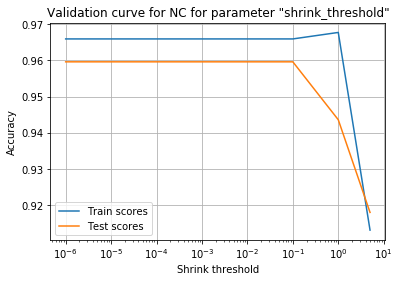

In [11]:
train_scores_means = np.mean(scores_train, axis=1)
test_scores_means = np.mean(scores_test, axis=1)
plt.figure()
plt.semilogx([0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5], train_scores_means, label='Train scores')
plt.semilogx([0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5], test_scores_means, label='Test scores')
plt.legend()
plt.title('Validation curve for NC for parameter "shrink_threshold"')
plt.xlabel('Shrink threshold')
plt.ylabel('Accuracy')

plt.grid();

Plot above shows, that model achieve high train and test accuracy for shrink_threshold value up to 0.1, than performance becomes worse.

Let's find the best *metric* value with Grid Search:

In [12]:
gs = GridSearchCV(NearestCentroid(shrink_threshold=0.1), param_grid={'metric': ['euclidean', 'manhattan', 'cosine']}, cv=10)
gs.fit(x_train, y_train)
print('Best parameters:', gs.best_params_, 'Best score:',  gs.best_score_)

Best parameters: {'metric': 'euclidean'} Best score: 0.9596774193548387


c:\python37\lib\site-packages\sklearn\neighbors\nearest_centroid.py:141: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn("Averaging for metrics other than "
c:\python37\lib\site-packages\sklearn\neighbors\nearest_centroid.py:141: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn("Averaging for metrics other than "
c:\python37\lib\site-packages\sklearn\neighbors\nearest_centroid.py:141: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn("Averaging for metrics other than "
c:\python37\lib\site-packages\sklearn\neighbors\nearest_centroid.py:141: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn("Averaging for metrics other than "
c:\python37\lib\site

In [13]:
nc = gs.best_estimator_

Now compare the models

In [14]:
print('Classification report for KNN')
print(classification_report(y_test, knn.predict(x_test)))

Classification report for KNN
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.90      0.95        21
           2       1.00      1.00      1.00        14

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.97      0.96      0.96        54



In [15]:
print('Classification report for NC')
print(classification_report(y_test, nc.predict(x_test)))

Classification report for NC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



The CN classifier shows better results than KNN. It has higher accuracy, precision, recall and f1 score. 

Now look at the confusion matrixes. We see, that models achieve pretty similar results, both models get an errors on the class label 1.

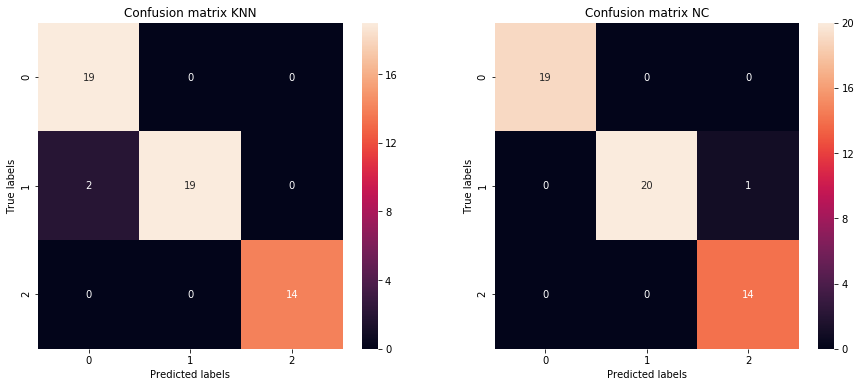

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15 ,6))
ax1 = sns.heatmap(confusion_matrix(y_test, knn.predict(x_test)), annot=True, ax=axes[0])
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Confusion matrix KNN')
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)
ax2 = sns.heatmap(confusion_matrix(y_test, nc.predict(x_test)), annot=True, ax=axes[1])
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Confusion matrix NC')
bottom, top = ax2.get_ylim()
ax2.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Plot decision boundaries.

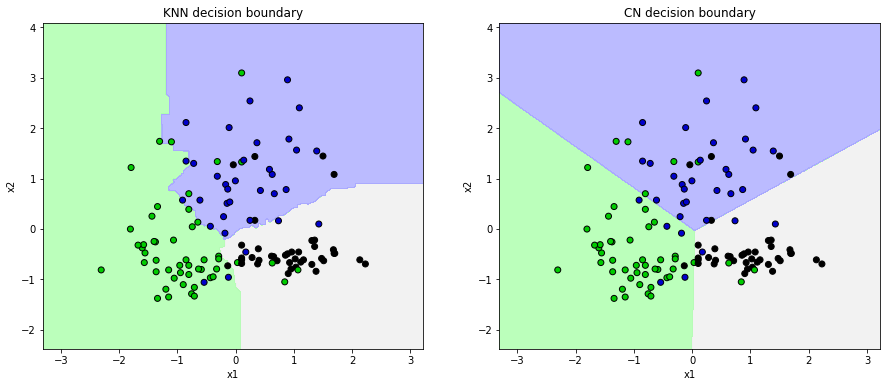

In [17]:
from matplotlib.colors import ListedColormap
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
h = .01
cmap_light = ListedColormap(['#EFEFEF', '#AAFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#000000', '#00CC00', '#0000CC'])
X = x_train[:, :2]
clf = KNeighborsClassifier(13, p=1, algorithm='auto')
clf.fit(X, y_train)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axes[0].contourf(xx, yy, Z, cmap=cmap_light, alpha = 0.8)
axes[0].scatter(X[:, 0], X[:, 1], c=y_train, cmap=cmap_bold, edgecolor = 'black')
axes[0].set_xlim(xx.min(), xx.max())
axes[0].set_ylim(yy.min(), yy.max())
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('KNN decision boundary')

clf = NearestCentroid(shrink_threshold=0.1, metric='euclidean')
clf.fit(X, y_train)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axes[1].contourf(xx, yy, Z, cmap=cmap_light, alpha = 0.8)
axes[1].scatter(X[:, 0], X[:, 1], c=y_train, cmap=cmap_bold, edgecolor = 'black')
axes[1].set_xlim(xx.min(), xx.max())
axes[1].set_ylim(yy.min(), yy.max())
axes[1].set_xlabel('x1')
axes[1].set_ylabel('x2')
axes[1].set_title('CN decision boundary');

Well, looking at plots and classification report, CNN is the winner. This classifier achieves 0.98 points of accuracy, recall, precision and f1 score, when KNN get 0.96 points in these metrics. 

KNN has very rough lines, while CN makes accurate boundaries. The plots above confirm, than CN performs better (is winner), when KNN maybe a little bit overfitted.